# Ignition Example

The following is a streamlined approach using YAML input to specify simulated conditions.

In [1]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


## 1. Function/Class Definitions

In [2]:
import cantera as ct
import ctwrap as cw
cw.__version__

'0.1.0'

## 2. Simulations

### 2.1 Create Simulation object

Uses a module in the `modules` folder. Modules do not have to depend on `ctwrap`.

In [3]:
sim = cw.Simulation.from_module(cw.modules.ignition)
sim

In [4]:
%%time
sim.run()

CPU times: user 613 ms, sys: 3.85 ms, total: 617 ms
Wall time: 632 ms


### 2.2 Create Simulation Handler

Parameters are specified via YAML file

In [5]:
# create variation object
fname = 'ignition.yaml'
sh = cw.SimulationHandler.from_yaml(fname, verbosity=1)
sh

Simulations for entry `initial.phi` with values: [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]


In [6]:
sh._entry

'initial.phi'

In [7]:
sh.tasks

{'initial.phi_0.4': 0.4,
 'initial.phi_0.6': 0.6,
 'initial.phi_0.8': 0.8,
 'initial.phi_1.0': 1.0,
 'initial.phi_1.2': 1.2,
 'initial.phi_1.4': 1.4,
 'initial.phi_1.6': 1.6,
 'initial.phi_1.8': 1.8}

In [8]:
sh.configuration('initial.phi_0.4')

{'initial': {'T': [1000.0, 'kelvin', 'initial temperature'],
  'P': [1.0, 'atmosphere', 'pressure'],
  'phi': [0.4, 'dimensionless', 'equivalence ratio'],
  'fuel': 'H2',
  'oxidizer': 'O2:1,AR:3.76'},
 'chemistry': {'mechanism': 'h2o2.xml'},
 'simulation': {'delta_t': 1e-05,
  'n_points': 500,
  'atol': 1e-15,
  'rtol': 1e-09}}

### 2.3 Run serial simulation

In [9]:
%%time
sh.run_serial(sim, verbosity=1)

 * processing `initial.phi_0.4`
 * processing `initial.phi_0.6`
 * processing `initial.phi_0.8`
 * processing `initial.phi_1.0`
 * processing `initial.phi_1.2`
 * processing `initial.phi_1.4`
 * processing `initial.phi_1.6`
 * processing `initial.phi_1.8`
CPU times: user 4.5 s, sys: 23.2 ms, total: 4.52 s
Wall time: 4.5 s


True

### 2.4 Run parallel simulation

In [10]:
%%time
sh.run_parallel(sim)

 * running simulation using 8 cores
 * processing `initial.phi_0.4` (Process-1)
 * processing `initial.phi_0.6` (Process-2)
 * processing `initial.phi_0.8` (Process-3)
 * processing `initial.phi_1.0` (Process-4)
 * processing `initial.phi_1.2` (Process-5)
 * processing `initial.phi_1.4` (Process-6)
 * processing `initial.phi_1.6` (Process-7)
 * processing `initial.phi_1.8` (Process-8)
CPU times: user 19.3 ms, sys: 46.3 ms, total: 65.6 ms
Wall time: 910 ms


True

## 3. Create graphical output

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

col = mpl.rcParams['axes.prop_cycle'].by_key()['color']

### 3.1 Load data from file

In [12]:
# load data from output file
data = cw.fileio.from_hdf(sh.oname)
data.keys()

dict_keys(['defaults', 'initial.phi_0.4', 'initial.phi_0.6', 'initial.phi_0.8', 'initial.phi_1.0', 'initial.phi_1.2', 'initial.phi_1.4', 'initial.phi_1.6', 'initial.phi_1.8', 'variation'])

In [13]:
# eliminate entries containing documentation
config = data.pop('defaults')
variation = data.pop('variation')
variation

{'entry': 'initial.phi',
 'tasks': ['initial.phi_0.4',
  'initial.phi_0.6',
  'initial.phi_0.8',
  'initial.phi_1.0',
  'initial.phi_1.2',
  'initial.phi_1.4',
  'initial.phi_1.6',
  'initial.phi_1.8'],
 'values': [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]}

### 3.2 Plot

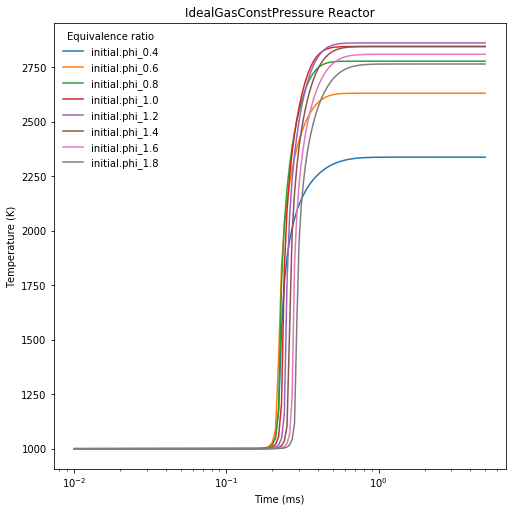

In [14]:
# create figure and adjust size/spacing
fig, ax = plt.subplots(1) #
fig.set_size_inches(8.,8.,forward=True)
fig.subplots_adjust(hspace=0,bottom=.125,top=.9,left=.17,right=.955)

# plot results
for f, key in enumerate(data):
    df = data[key]
    ax.semilogx(1000*df['t (s)'],df['T (K)'],color=col[f],label=key) 

# add title/axis labels
ax.set_title(r'IdealGasConstPressure Reactor')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Temperature (K)')

# add legend
leg = ax.legend(loc='upper left',#prop={'size':11},
                title='Equivalence ratio') # % mech)
leg.draw_frame(False) 

# show and save
plt.show()